In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import pickle

import numpy as np
import pandas as pd
import seaborn as sns

from var_selection import variable_selection

np.set_printoptions(precision=4)
pd.set_option('display.max_rows', 12)
sns.set(context='talk', style='ticks')

Populating the interactive namespace from numpy and matplotlib


In [3]:
size = 1000
dims = 10
zero_coefs = [1, 3, 5, 7, 9]

In [4]:
np.random.seed(0)
coefs = np.random.rand(1, dims)
coefs[:, zero_coefs] = 0

X = np.random.rand(size, dims)
Y = ((X @ coefs.T) + np.random.randn(size, 1)*10)

print("True β coefficients:")
coefs

True β coefficients:


array([[ 0.5488,  0.    ,  0.6028,  0.    ,  0.4237,  0.    ,  0.4376,
         0.    ,  0.9637,  0.    ]])

In [5]:
β_zero = np.zeros(dims)
var_zero = 1000
p = np.array([0.5, 0.5, 1, 1, 0, 0, 0.1, 0.1, 0.9, 0.9])
τ = np.ones_like(β_zero)
υ = -10 * np.ones_like(β_zero)
λ = 10 * np.ones_like(β_zero)
ν = 2
iterations = int(5e4)

In [86]:
results = variable_selection(X, Y, β_zero,
                             var_zero, p,
                             τ, ν, υ, λ,
                             iterations,
                             verbose=10)

β, var, chain, probs, models = results

with open('results.pickle', 'wb') as fp:
    pickle.dump(results, fp)

/home/mtambos/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


0th iteration
Error: 91739.15446822316
β: [ 1.2608  0.      0.      0.     -0.1884 -0.0534  1.1311 -0.1073  0.      0.    ]
σ²: 90.21617174934143, σ: 9.498219398884268

5000th iteration
Error: 91127.56588297234
β: [ 4.0134  0.      0.      0.     -0.2838  0.9148 -1.5198  0.178   0.
 -0.9757]
σ²: 96.98784885677175, σ: 9.848240901641864

10000th iteration
Error: 91146.16144967767
β: [ 3.2083 -0.1324  0.      0.     -0.8208  0.5474 -1.2697  0.7098  0.      0.    ]
σ²: 91.06073392940172, σ: 9.542574806067895

15000th iteration
Error: 91148.93024163331
β: [ 2.6943  0.      0.      0.     -0.2685  1.213  -1.6003  1.3101 -0.6651
 -0.3377]
σ²: 92.30127953788262, σ: 9.607355491386931

20000th iteration
Error: 91592.88058735244
β: [ 1.52    0.7268  0.      0.     -0.6106 -0.4105  0.195   0.5467  0.      0.    ]
σ²: 87.91693890817045, σ: 9.376403303408534

25000th iteration
Error: 91366.18198974445
β: [ 1.4187  0.082   0.      0.      0.6826  0.7322 -0.3896  0.0327  0.      0.    ]
σ²: 93.5339868

In [6]:
with open('results.pickle', 'rb') as fp:
    results = pickle.load(fp)

β, var, chain, probs, models = results
coefs = np.array([[0.5488, 0., 0.6028, 0., 0.4237,
                   0., 0.4376, 0., 0.9637, 0.]])

In [7]:
β_lstsq, *_ = np.linalg.lstsq(X, Y)
print("Least squares solution")
print(np.array_repr(β_lstsq.flatten(), suppress_small=True, precision=2))
print("Least squares error")
lstsq_err = Y - X@β_lstsq
lstsq_err = (lstsq_err.T @ lstsq_err)**0.5
lstsq_err /= len(X)
print(np.array_repr(lstsq_err, suppress_small=False))

Least squares solution
array([ 2.51, -0.64,  1.05,  0.26,  0.  ,  0.77, -1.32,  0.45,  0.22, -1.38])
Least squares error
array([[ 0.3012]])


In [8]:
print("GVS solution")
print(np.array_repr(β.flatten(), suppress_small=True, precision=2))
print("GVS error")
gvs_err = Y - X@np.atleast_2d(β).T
gvs_err = (gvs_err.T @ gvs_err)**0.5
gvs_err /= len(X)
print(np.array_repr(gvs_err, suppress_small=False))

GVS solution
array([ 2.52, -0.74,  0.  ,  0.  ,  0.65,  0.52, -1.48,  0.  , -0.3 ,  0.  ])
GVS error
array([[ 0.302]])


In [9]:
df = pd.DataFrame(chain, columns=[f'β_{i}' for i in range(dims)] + ['σ²'])
df['σ'] = df['σ²']**0.5
df = df.drop('σ²', axis=1)
df

,β_0,β_1,β_2,β_3,β_4,β_5,β_6,β_7,β_8,β_9,σ
0,1.260826,0.000000,0.0,0.0,-0.188407,-0.053404,1.131083,-0.107325,0.000000,0.0,9.498219
1,0.691937,0.928748,0.0,0.0,-1.323416,0.670594,0.808980,0.078105,0.000000,0.0,9.558842
2,1.104263,0.000000,0.0,0.0,-1.210911,0.863394,-0.595400,1.517362,0.000000,0.0,9.569119
3,0.693375,-0.436089,0.0,0.0,-0.304608,1.007764,-0.111225,0.186538,-0.339761,0.0,9.667968
4,2.154715,0.000000,0.0,0.0,-0.020559,-0.360166,-0.037173,-0.559488,0.000000,0.0,9.609796
5,2.064816,0.000000,0.0,0.0,0.176816,0.690526,0.000000,-0.480175,0.000000,0.0,9.640297
...,...,...,...,...,...,...,...,...,...,...,...
49994,1.292651,0.000000,0.0,0.0,0.574393,0.367353,-0.909583,1.408523,-1.035943,0.0,9.338193
49995,1.290948,0.000000,0.0,0.0,0.182019,0.887234,-0.734716,0.383483,0.000000,0.0,9.567462
49996,1.815583,0.000000,0.0,0.0,-0.007301,0.147941,-0.261560,0.318919,0.000000,0.0,9.204502


In [10]:
df['idx'] = pd.PeriodIndex(start='2017-07-08', periods=iterations, freq='s')
df.set_index('idx', inplace=True)
df

,β_0,β_1,β_2,β_3,β_4,β_5,β_6,β_7,β_8,β_9,σ
idx,,,,,,,,,,,
2017-07-08 00:00:00,1.260826,0.000000,0.0,0.0,-0.188407,-0.053404,1.131083,-0.107325,0.000000,0.0,9.498219
2017-07-08 00:00:01,0.691937,0.928748,0.0,0.0,-1.323416,0.670594,0.808980,0.078105,0.000000,0.0,9.558842
2017-07-08 00:00:02,1.104263,0.000000,0.0,0.0,-1.210911,0.863394,-0.595400,1.517362,0.000000,0.0,9.569119
2017-07-08 00:00:03,0.693375,-0.436089,0.0,0.0,-0.304608,1.007764,-0.111225,0.186538,-0.339761,0.0,9.667968
2017-07-08 00:00:04,2.154715,0.000000,0.0,0.0,-0.020559,-0.360166,-0.037173,-0.559488,0.000000,0.0,9.609796
2017-07-08 00:00:05,2.064816,0.000000,0.0,0.0,0.176816,0.690526,0.000000,-0.480175,0.000000,0.0,9.640297
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-08 13:53:14,1.292651,0.000000,0.0,0.0,0.574393,0.367353,-0.909583,1.408523,-1.035943,0.0,9.338193
2017-07-08 13:53:15,1.290948,0.000000,0.0,0.0,0.182019,0.887234,-0.734716,0.383483,0.000000,0.0,9.567462


In [11]:
df2 = df.resample('50s').last()
df2

,β_0,β_1,β_2,β_3,β_4,β_5,β_6,β_7,β_8,β_9,σ
idx,,,,,,,,,,,
2017-07-08 00:00:00,5.211963,0.000000,0.0,0.0,-0.692579,0.419835,-2.839028,-0.518223,0.000000,0.000000,9.536242
2017-07-08 00:00:50,2.784501,-0.125555,0.0,0.0,1.686004,0.725636,-1.229655,0.940623,0.000000,-3.100947,9.776805
2017-07-08 00:01:40,2.875919,0.000000,0.0,0.0,0.200447,1.347520,-2.619896,-0.429108,0.000000,0.000000,9.409861
2017-07-08 00:02:30,3.839461,0.000000,0.0,0.0,-1.616206,0.233713,-1.518236,0.804612,0.000000,0.000000,9.963107
2017-07-08 00:03:20,3.213808,0.706733,0.0,0.0,-0.226579,-0.597506,0.407385,-1.082157,0.000000,0.000000,9.638951
2017-07-08 00:04:10,0.000000,0.000000,0.0,0.0,-0.264600,1.995089,-0.580224,1.385070,0.000000,-1.156677,9.671846
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-08 13:48:20,2.785029,-2.010628,0.0,0.0,-0.345482,-0.327373,-0.838272,1.088495,0.000000,0.000000,9.892618
2017-07-08 13:49:10,2.524166,-0.228379,0.0,0.0,-0.251831,0.303235,-1.137531,0.591542,0.000000,0.000000,9.305414


In [12]:
df3 = df.resample('250s').last()
df3

,β_0,β_1,β_2,β_3,β_4,β_5,β_6,β_7,β_8,β_9,σ
idx,,,,,,,,,,,
2017-07-08 00:00:00,3.213808,0.706733,0.0,0.0,-0.226579,-0.597506,0.407385,-1.082157,0.000000,0.000000,9.638951
2017-07-08 00:04:10,2.470873,1.328834,0.0,0.0,-0.188429,0.941462,-2.271967,-0.161610,0.000000,0.000000,9.520681
2017-07-08 00:08:20,2.570909,0.000000,0.0,0.0,0.976283,1.113306,-3.569712,0.436655,0.000000,0.000000,9.598419
2017-07-08 00:12:30,2.785139,0.000000,0.0,0.0,-0.499454,0.299596,-1.473946,0.867271,0.000000,0.000000,9.363479
2017-07-08 00:16:40,1.168322,0.000000,0.0,0.0,0.998347,0.746453,-1.108535,0.000000,0.000000,0.000000,9.599005
2017-07-08 00:20:50,1.796233,0.000000,0.0,0.0,0.289837,0.918818,0.840347,0.025265,0.000000,-1.270083,9.235091
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-08 13:28:20,1.944429,-1.138701,0.0,0.0,0.490870,0.642626,-0.352277,0.193080,0.000000,0.000000,9.685262
2017-07-08 13:32:30,3.121159,-2.187533,0.0,0.0,1.571403,-0.237349,-2.097970,0.868830,0.000000,0.000000,9.335241


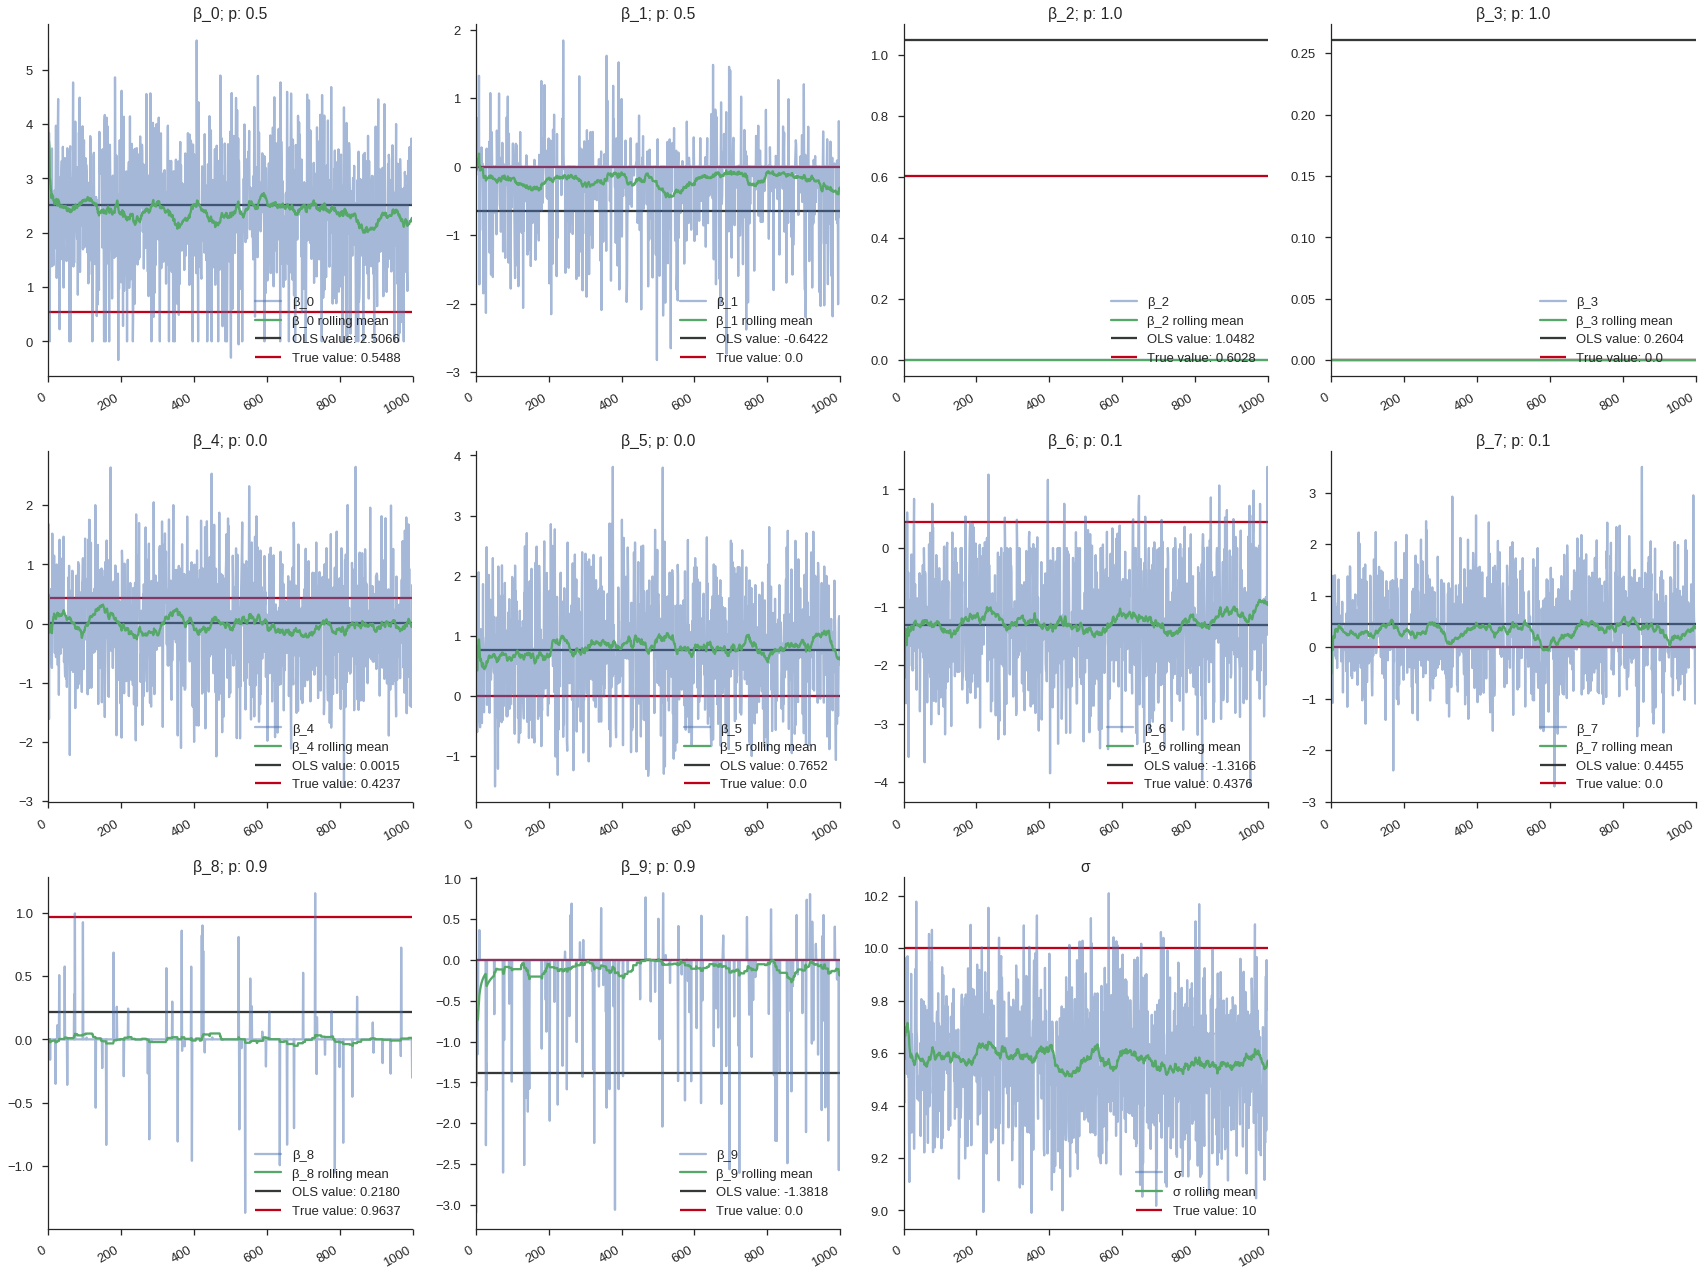

In [13]:
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
axes = axes.flatten()

for i, (ax, (col_name, values)) in enumerate(zip(axes, df2.iteritems())):
    title = col_name
    if i < len(coefs[0]):
        title += f"; p: {p[i]}"
    values.plot(ax=ax, use_index=False, alpha=0.5,
               title=title)
    values.rolling(window=50, min_periods=1)\
          .mean()\
          .plot(ax=ax, use_index=False, label=f'{col_name} rolling mean')
    if i < len(coefs[0]):
        ax.hlines(β_lstsq[i], 0, len(df2),
                  label=f'OLS value: {β_lstsq[i][0]:.4f}',
                  color=sns.xkcd_rgb['charcoal'])
        ax.hlines(coefs[0][i], 0, len(df2),
                  label=f'True value: {coefs[0][i]}',
                  color=sns.xkcd_rgb['scarlet'])
    else:
        ax.hlines(10, 0, len(df2),
                  label=f'True value: 10',
                  color=sns.xkcd_rgb['scarlet'])
    ax.legend(loc='lower right')

fig.delaxes(axes[-1])
sns.despine()
plt.tight_layout()
fig.savefig('./variable_selection_synth_data_1k_thin.png')

/home/mtambos/anaconda/lib/python3.6/site-packages/pandas/plotting/_misc.py:557: RuntimeWarning: invalid value encountered in double_scalars
  (data[h:] - mean)).sum() / float(n) / c0


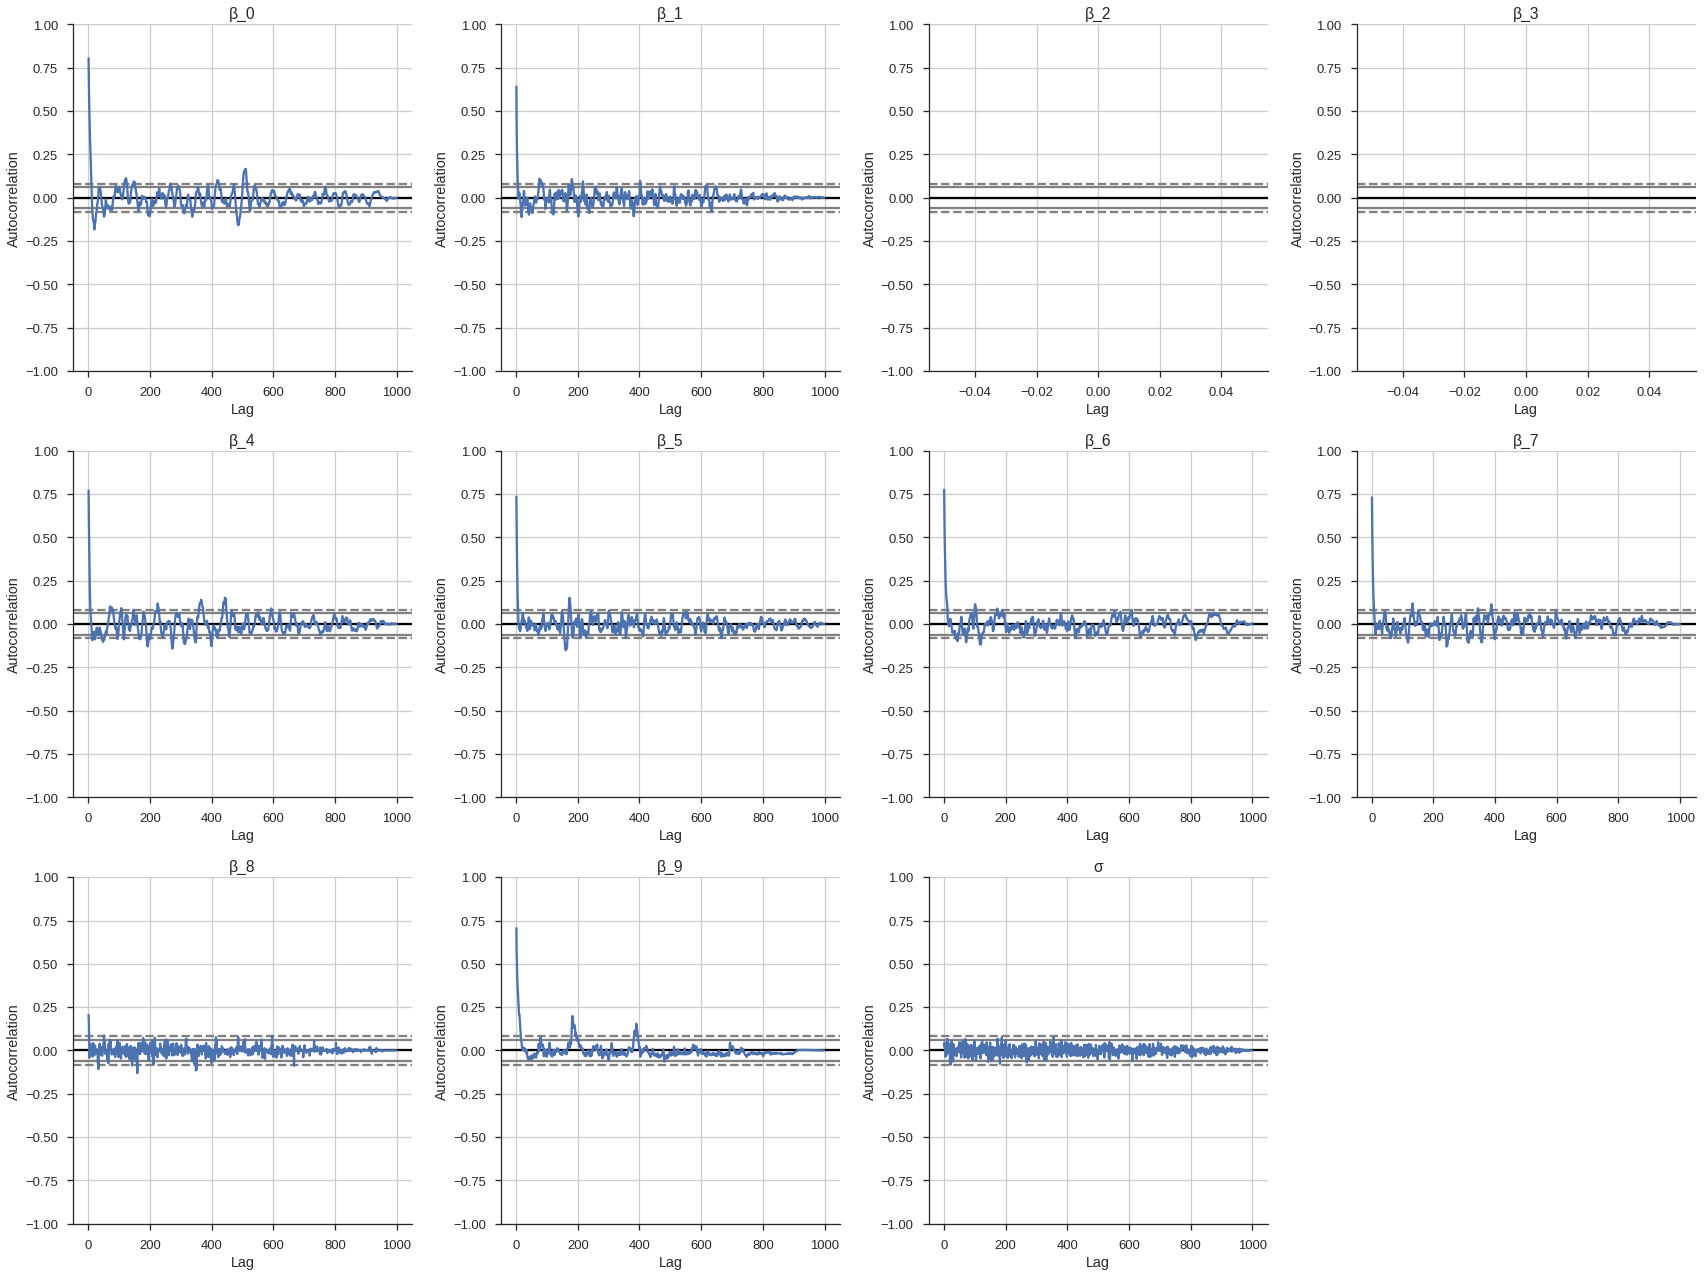

In [15]:
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
axes = axes.flatten()

for i, (ax, (col_name, values)) in enumerate(zip(axes, df[:1000].iteritems())):
    autocorrelation_plot(values, ax=ax)
    ax.set_title(col_name)
    ax.set_ylim(-1, 1)

fig.delaxes(axes[-1])
sns.despine()
plt.tight_layout()
fig.savefig('./variable_selection_synth_data_no_thin_autocor.png')